In [1]:
# Import necessary components
from pathlib import Path

import pandas

import seaborn as sns

In [2]:
# configure seaborn so resulting plots look nicer
sns.set_theme(style="darkgrid")



In [3]:
# define where the data may be located, and assert that it actually exists on the file system.
target = Path() / ".."/  "data" /"us-graph-2015-02.csv"
assert target.exists(), f"cannot locate data {target.absolute()}"

In [4]:
# load the data using pandas.
df = pandas.read_csv(
    # the first positional argument is the path to the dataset
    target, 
    # here we specify that the first column will be used as the index
    index_col=0
)

In [5]:
# The dataset has trailing whitespace in the index, 
# so here we remove that whitespace to make the dataset more intuitive to work with.
df = df.rename(lambda key: key.strip())

# Transforming the dates

Unfortunately, the date format the input data is not in a standard format, so Pandas doesn't understand it by default.
We need to transform it into a form pandas can understand.

Presently, the `columns` of this dataframe contain the offending dates, and Pandas provides this [`to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function.

In [6]:
# Here we transform the columns, which are dates in the <month>-<shorthand year> format into datetime objects,
# as plotting timeseries is special-cased in pandas and desirable.
df.columns = pandas.to_datetime(df.columns, format="%b-%y")

# Viewing the processed data frame
Now that the data has been processed into a suitable form for analysis, let's review what we have.

In [7]:
df

,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,2013-06-01,2013-07-01,2013-08-01,...,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,2015-01-01,2015-02-01
Provider,,,,,,,,,,,,,,,,,,,,,
Comcast,2.17,2.10,2.01,2.06,2.09,2.11,2.13,2.10,2.09,2.04,...,2.72,2.61,2.82,2.90,2.92,3.05,3.11,3.24,3.28,3.36
Cox,2.07,2.00,1.96,2.12,2.25,2.31,2.36,2.39,2.44,2.47,...,2.94,2.99,3.00,3.03,3.04,3.09,3.11,3.21,3.32,3.38
AT&T - U-verse,1.94,1.92,1.83,1.91,1.97,2.00,1.99,1.91,1.90,1.92,...,1.70,1.50,1.44,2.61,2.77,2.86,2.94,3.02,3.03,3.11
Verizon - FiOS,2.19,2.10,2.04,2.10,2.15,2.17,2.17,2.15,2.15,2.14,...,1.90,1.58,1.61,2.41,3.17,3.24,3.27,3.36,3.43,3.53
AT&T - DSL,1.42,1.41,1.37,1.43,1.46,1.48,1.47,1.40,1.38,1.39,...,1.26,1.13,1.11,1.81,1.91,1.96,2.01,2.07,2.13,2.20


## What we have
Here we have five rows - one per ISP. the 28 columns refer to each specic month within the dataset.
What we want is time-series data, as this dataset is a *series* of observations *over time*.

What we have is almost correct, however the X and Y axies are reversed. If we try to plot this now, the output would not be very meaningful.


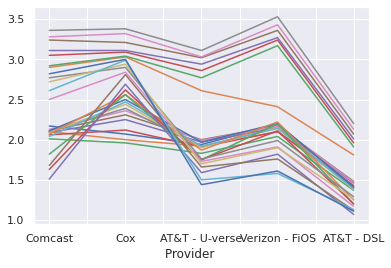

In [8]:
# plot the data, which returns a reference to the plot
ax = df.plot()
# remove the legand from the plotted axis, to make the data slightly easier to read.
ax.get_legend().remove()

Thankfully this appears to be a common issue, and pandas has a convenient helper property to reverse the columns and rows.

# `df.T`
the `T` property of a dataframe transposes the index and the columns.
In our use case, this efficiently transforms the data into a format more suitable for analysis and produces meaningful plots.

Note: the `df.plot` method accepts `matplotlib` arguments, which may be used to control the rendering.

In [9]:
df.T

Provider,Comcast,Cox,AT&T - U-verse,Verizon - FiOS,AT&T - DSL
2012-11-01,2.17,2.07,1.94,2.19,1.42
2012-12-01,2.10,2.00,1.92,2.10,1.41
2013-01-01,2.01,1.96,1.83,2.04,1.37
2013-02-01,2.06,2.12,1.91,2.10,1.43
2013-03-01,2.09,2.25,1.97,2.15,1.46
2013-04-01,2.11,2.31,2.00,2.17,1.48
2013-05-01,2.13,2.36,1.99,2.17,1.47
2013-06-01,2.10,2.39,1.91,2.15,1.40
2013-07-01,2.09,2.44,1.90,2.15,1.38
2013-08-01,2.04,2.47,1.92,2.14,1.39


# Plotting the data
The data is now in a suitable format for plotting.
DataFrames have helper methods that wrap the underlying `matplotlib` calls, allowing them to be easily plotted.

<AxesSubplot:title={'center':'Average Netflix download speeds by ISP'}, ylabel='Download speed (Mbps)'>

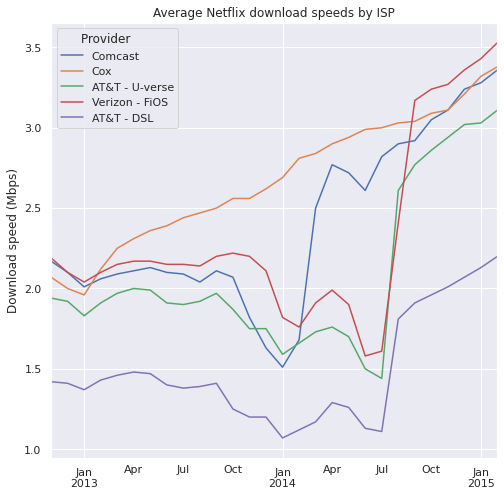

In [10]:
df.T.plot(title="Average Netflix download speeds by ISP", ylabel="Download speed (Mbps)", figsize=(8,8))

# The results.
The above plot produced a meangful, unambiguous, and informative graph.
Between October of 2013, and sharply resolving in July of 2014, there was quite an anomally.

Multiple Internet Service Providers (ISP) were observed with significantly lower average download speeds than in previous periods. Further, these download speeds curiously skyrocketed in July of 2014.

The reasons for this are beyond the scope of this presentation but, if this has piqued your interest, here are some related news articles:
- https://arstechnica.com/information-technology/2014/02/netflix-performance-on-verizon-and-comcast-has-been-dropping-for-months/
- https://arstechnica.com/information-technology/2014/02/netflix-is-paying-comcast-for-direct-connection-to-network-wsj-reports/
- https://arstechnica.com/tech-policy/2014/03/netflix-says-it-will-pay-tolls-to-more-isps-not-just-comcast/
